## 간단한 예제

- `tensorflow`가 정상적으로 설치되었는지 확인

In [2]:
import tensorflow as tf

In [3]:
a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.mul(a, b)

sess = tf.Session()
sess.run(y, feed_dict={a:3, b:3})

9.0

## 선형회귀분석 (Linear Regression)

- `독립변수(xi)`, `상수항(b)`, `종속변수(y)` 사이의 관계를 모델링 하는 방법

In [22]:
import numpy as np
import matplotlib.pyplot as plt

$y = 0.1 * x + 0.3$ 의 데이터에 약간의 랜덤값을 줘서 데이터 생성

In [33]:
num_points = 1000
vectors_set = []

for i in range(num_points):
    xi = np.random.normal(0.0, 0.55)
    yi = xi * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([xi, yi])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

/Users/seokjoonyun/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


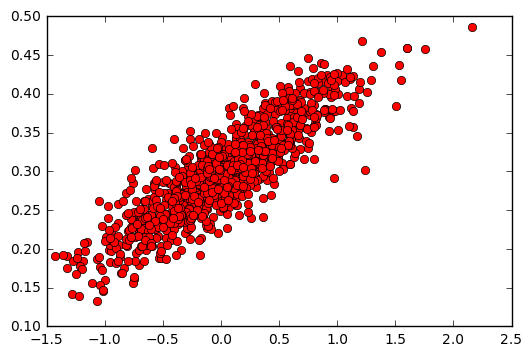

In [34]:
plt.plot(x_data, y_data, 'ro')
plt.legend()
plt.show()

#### 위 데이터를 이용해서 학습

- `y_data` = `W` * `x_data` + `b` 의 모델로 표현
- 데이터 셋들을 반복 적용하여 더 정확한 결과를 위한 `W`,`b`를 수정
- `비용함수(cost function)`
  - 반복이 일어날 때마다 개선되고 있는지 확인하기 위해 얼마나 좋은 직선인지 측정
  - `오차함수 (error function)`이라고도 함
- `평균제곱오차 (mean square error)`를 비용함수로 사용
  - 실제 값과 알고리즘이 반복할때마다 추정한 값 사이의 거리를 오차로 하는 값의 평균

In [35]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

In [36]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [52]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [53]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [54]:
for step in range(8):
    sess.run(train)
    print('train step [{0}] : {1} , {2}'.format(step, sess.run(W), sess.run(b)))

print(sess.run(W), sess.run(b))

train step [0] : [ 0.57376522] , [ 0.28857195]
train step [1] : [ 0.43484265] , [ 0.29119939]
train step [2] : [ 0.33654419] , [ 0.29311261]
train step [3] : [ 0.26698971] , [ 0.29446635]
train step [4] : [ 0.21777394] , [ 0.29542425]
train step [5] : [ 0.18294963] , [ 0.29610205]
train step [6] : [ 0.15830845] , [ 0.29658163]
train step [7] : [ 0.14087273] , [ 0.29692098]
[ 0.14087273] [ 0.29692098]


/Users/seokjoonyun/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


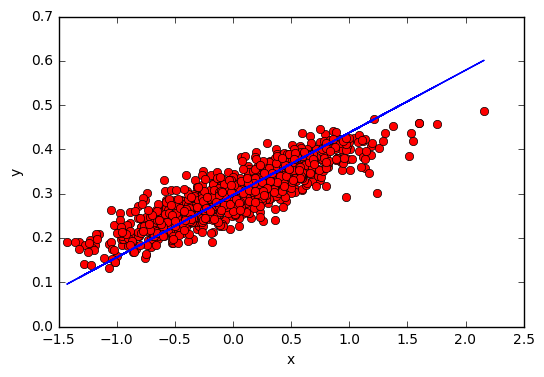

In [55]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()